In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
data_info = pd.read_csv('data/data_info.csv', encoding = 'cp949')

In [ ]:
train.head(3)

,ID,Utterance,Speaker,Dialogue_ID,Target
0,TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,neutral
1,TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,neutral
2,TRAIN_0002,That I did. That I did.,Chandler,0,neutral


In [ ]:
data_info

,feature,information,type
0,ID,고유번호,object
1,Utterance,발화문,object
2,Speaker,발화자,object
3,Dialogue_ID,Dialogue 구분 번호,int
4,Target,감정,object


In [ ]:
train.shape

(9989, 5)

### EDA 및 전처리

#### Utterance (발화문)

In [12]:
import nltk

In [13]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
from nltk.tokenize import sent_tokenize

In [9]:
train['Utterance'][100]

"Um, absolutely. Uh, how 'bout tomorrow afternoon? Do you know uh, Central Perk in the Village, say, five-ish?"

- Dialogue_ID : 하나의 대화
    - Speaker 간의 대화는 같은 대화 내에서 이루어짐
    - Dialogue_ID가 다르면 다른 대화

In [6]:
train['Dialogue_ID'].unique()

array([   0,    1,    2, ..., 1036, 1037, 1038], dtype=int64)

In [7]:
train[train['Dialogue_ID'] == 1]

,ID,Utterance,Speaker,Dialogue_ID,Target
14,TRAIN_0014,But then who? The waitress I went out with las...,Joey,1,surprise
15,TRAIN_0015,You know? Forget it!,Rachel,1,sadness
16,TRAIN_0016,"No-no-no-no, no! Who, who were you talking about?",Joey,1,surprise
17,TRAIN_0017,"No, I-I-I-I don't, I actually don't know",Rachel,1,fear
18,TRAIN_0018,Ok!,Joey,1,neutral
19,TRAIN_0019,"All right, well...",Joey,1,neutral
20,TRAIN_0020,"Yeah, sure!",Rachel,1,neutral


In [8]:
train['Dialogue_ID'].value_counts()

523    24
54     24
450    24
649    24
530    24
       ..
987     1
790     1
581     1
490     1
742     1
Name: Dialogue_ID, Length: 1038, dtype: int64

- Target
    - neutral : 감정 없음
    - surprise : 놀람
    - fear : 두려움
    - sadness : 슬픔
    - joy : 기쁨
    - disgust : 싫음
    - anger : 화남

감정없음(중립)이 가장 많고, 그에 비해 다른 감정의 수는 적음

In [3]:
train['Target'].unique()

array(['neutral', 'surprise', 'fear', 'sadness', 'joy', 'disgust',
       'anger'], dtype=object)

c:\Users\rproject\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


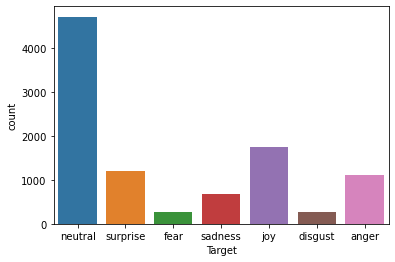

In [5]:
sns.countplot(train['Target'])
plt.show()

머신러닝 알고리즘은 숫자형의 피처 데이터만 입력받을 수 있기 때문에, 텍스트를 피처 형태로 치환해줌
- neutral → 0
- surprise → 1
- fear → 2
- sadness → 3
- joy → 4
- disgust → 5
- anger → 6

In [ ]:
train['Target'] = train['Target'].replace(['neutral', 'surprise', 'fear', 'sadness', 'joy', 'disgust', 'anger'],[0, 1, 2, 3, 4, 5, 6])
train.head(3)